# Iris Flower Classification 

The iris flower dataset is perhaps the most famous dataset for classification. It contains 3 types of flowers with 4 features.

### Columns are:  
#### Input Features   
**Sepal Length** - Sepal length of flower  
**Sepal Width** - Sepal width of flower  
**Petal Length** - Petal length of flower  
**Petal Width** - Petal width of flower  

#### Output Feature 
**Flower** - The type of flower (Iris-setosa, Iris-virginica, Iris-versicolor)

### Importing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
import numpy as np

%matplotlib inline

In [2]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('iris.data.txt', header=None, names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1
### Convert flower column to numerical

In [3]:
mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['value'] = df['flower'].apply(lambda x: mapping[x])

## Question 2
### Plot a bar chart of the flowers

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

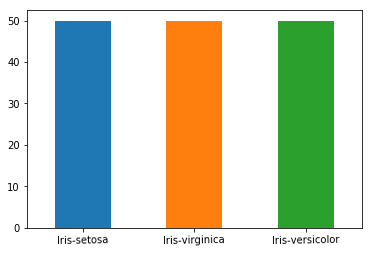

In [4]:
df["flower"].value_counts().plot(kind="bar")
plt.xticks(rotation = 1)

## Question 3
### Plot a pair wise plot of each feature. Select two features for classification

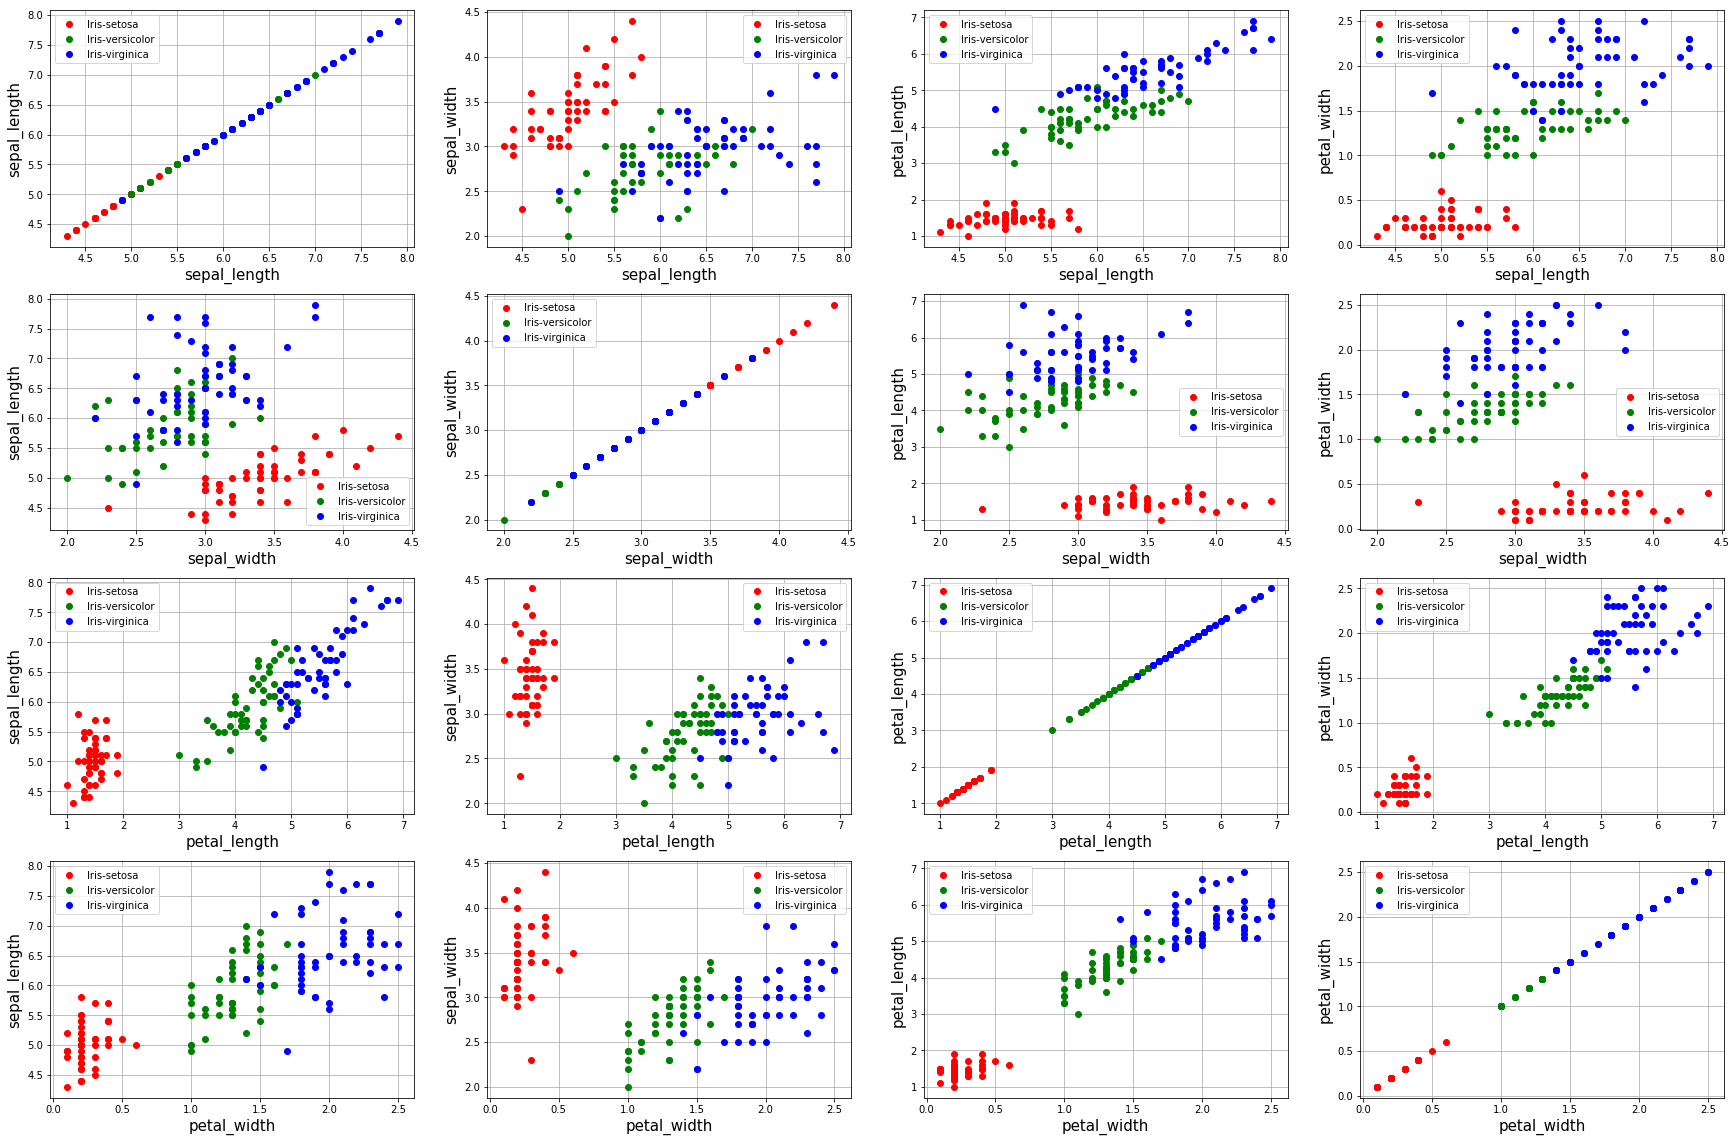

In [5]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
i=0
plt.figure(figsize=(30,20))
for everyval in col:
    for everycol in col:
        plt.subplot(4,4,i+1)
        plt.plot(df[everyval][df.value == 0],df[everycol][df.value == 0],"ro",label="Iris-setosa")
        plt.plot(df[everyval][df.value == 1],df[everycol][df.value == 1],"go",label="Iris-versicolor")
        plt.plot(df[everyval][df.value == 2],df[everycol][df.value == 2],"bo",label="Iris-virginica")
        plt.xlabel(everyval,fontsize=15)
        plt.ylabel(everycol,fontsize=15)
        plt.legend()
        plt.grid()
        i=i+1
       

We choose petal length and petal width as our primary features for flower classification

In [6]:
X = df[["petal_length","petal_width"]]
Y = df["value"]

## Question 4
### Split dataset into training and testing data with state 9032

In [7]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=9032)

## Question 5
### Obtain decision tree model with depth 2. Show the decision tree. Obtain confusion matrix for the predictions

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import os 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

os.environ["PATH"]+=os.pathsep+'C:\Program Files (x86)\Graphviz2.38\bin'

### (Depth = 2)

In [9]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree = dtree.fit(xtrain,ytrain)

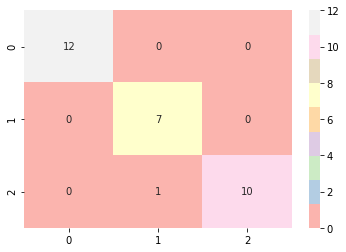

In [10]:
Predicted_Class = obtained_tree.predict(xtest)
sb.heatmap(metrics.confusion_matrix(ytest,Predicted_Class),annot=True,cmap='Pastel1',xticklabels=dtree.classes_,yticklabels=dtree.classes_)

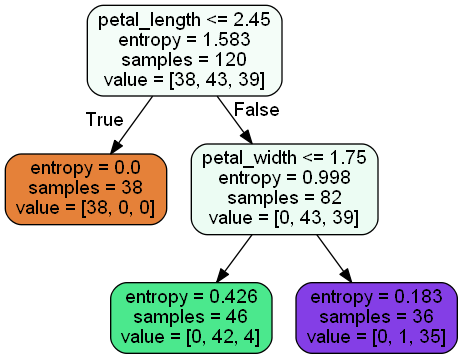

In [11]:
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["petal_length","petal_width"])

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

### Repeate Question 4 & 5 for depth of tree 3 & 4

### (Depth = 3)

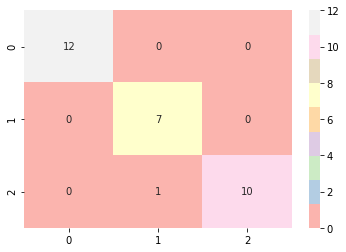

In [12]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
obtained_tree = dtree.fit(xtrain,ytrain)

Predicted_Class = obtained_tree.predict(xtest)
sb.heatmap(metrics.confusion_matrix(ytest,Predicted_Class),annot=True,cmap='Pastel1',xticklabels=dtree.classes_,yticklabels=dtree.classes_)

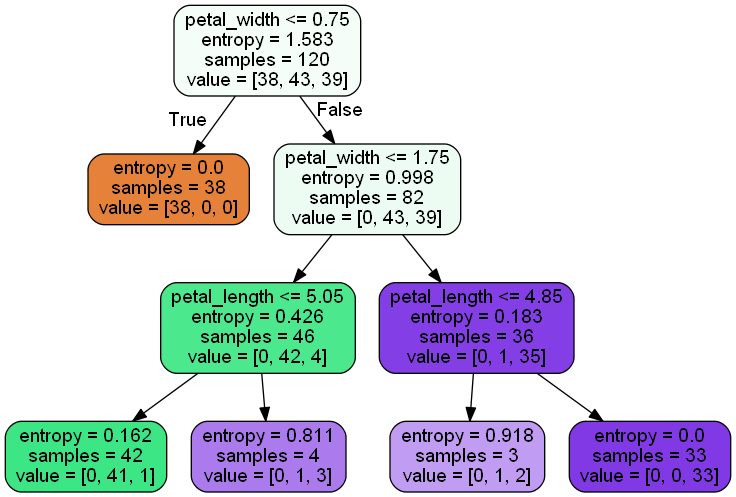

In [13]:
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["petal_length","petal_width"])

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

### (Depth = 4)

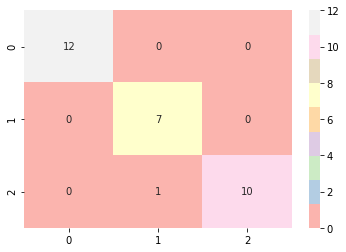

In [14]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
obtained_tree = dtree.fit(xtrain,ytrain)

Predicted_Class = obtained_tree.predict(xtest)
sb.heatmap(metrics.confusion_matrix(ytest,Predicted_Class),annot=True,cmap='Pastel1',xticklabels=dtree.classes_,yticklabels=dtree.classes_)

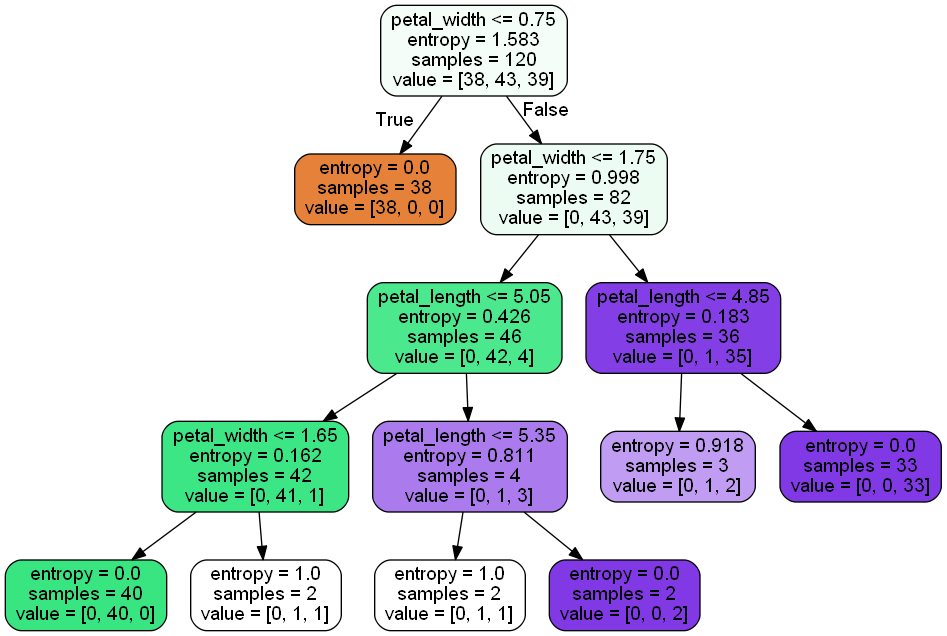

In [15]:
DecisionTreeImg=StringIO()
export_graphviz(obtained_tree,out_file=DecisionTreeImg,filled=True,rounded=True,feature_names=["petal_length","petal_width"])

graph=pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

## Question 6
### Plot Decision Tree boundaries for training dataset using the Meshgrid

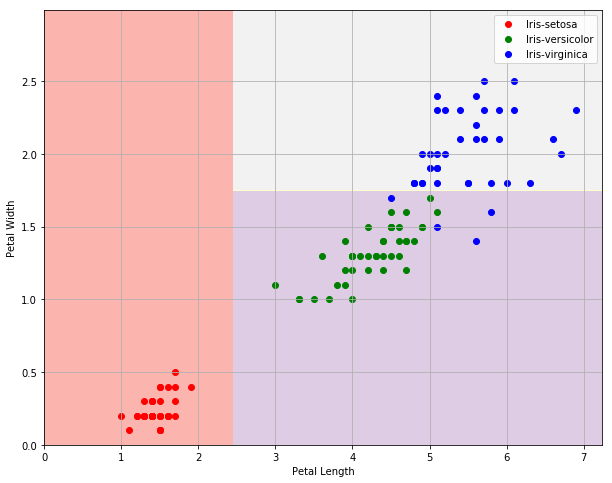

In [16]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
obtained_tree = dtree.fit(xtrain,ytrain)

x_min,x_max = 0,7.25
y_min,y_max = 0,3 

xx,yy = np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max,.01))
xx_lin = xx.ravel();
yy_lin = yy.ravel();
pred_input = np.c_[xx_lin,yy_lin]
Z = obtained_tree.predict(pred_input)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,8))
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(xtrain['petal_length'][ytrain == 0],xtrain['petal_width'][ytrain == 0],color='r',label='Iris-setosa')
plt.scatter(xtrain['petal_length'][ytrain == 1],xtrain['petal_width'][ytrain == 1],color='g',label='Iris-versicolor')
plt.scatter(xtrain['petal_length'][ytrain == 2],xtrain['petal_width'][ytrain == 2],color='b',label='Iris-virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.grid()

## Question 7
### Divide the dataset into 10 groups(call them G1-G10), each containing equal number of distribution of flowers. Take the G1-G9 as the training dataset, and G10 as the testing dataset and find the score of the model. Then take G1-G8, G10 as the training dataset and G9 as the testing dataset and get the score of the model. Keep on doing this till every group is a test dataset, and rest of them are training dataset. You should have 10 scores at the end of this operation. Get average of these 10 scores

In [17]:
Group = np.array_split(df,10)

In [18]:
sum = 0.0
for i in range(10):
    train = pd.DataFrame()
    test = pd.DataFrame()
    for j in range(10):
        if j == i:
            continue
        train = train.append(Group[j])
    test = Group[i]
    dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
    obtained_tree = dtree.fit(train[["petal_length","petal_width"]],train["value"])
    sum += float(obtained_tree.score(test[["petal_length","petal_width"]],test["value"]))
print("The Average of all Scores is: {0:.5f}".format(sum/10))

The Average of all Scores is: 0.93333
